In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path ='modified_Bank Customer Churn Prediction.csv'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head(10)

Unnamed: 0  credit_score country  gender  age  tenure    balance  \
0           0           619  France  Female   42       2       0.00   
1           1           608   Spain  Female   41       1   83807.86   
2           2           502  France  Female   42       8  159660.80   
3           3           699  France  Female   39       1       0.00   
4           4           850   Spain  Female   43       2  125510.82   
5           5           645   Spain    Male   44       8  113755.78   
6           6           822  France    Male   50       7       0.00   
7           8           501  France    Male   44       4  142051.07   
8           9           684  France    Male   27       2  134603.88   
9          10           528  France    Male   31       6  102016.72   

   products_number  credit_card  active_member  ...  age_seg_B  age_seg_C  \
0                1            1              1  ...          1          0   
1                1            0              1  ...          1          0   
2                3            1              0  ...          1          0   
3                2            0              0  ...          1          0   
4                1            1              1  ...          1          0   
5                2            1              0  ...          1          0   
6                2            1              1  ...          1          0   
7                2            0              1  ...          1          0   
8                1            1              1  ...          0          0   
9                2            0              0  ...          0          0   

   credit_score_seg  balance_seg  tenure_seg  age_group  gender_country  \
0                 2            0           0      37-55   Female_France   
1                 2            1           0      37-55    Female_Spain   
2                 1            3           3      37-55   Female_France   
3                 5            0           0      37-55   Female_France   
4                 6            2           0      37-55    Female_Spain   
5                 3            2           3      37-55      Male_Spain   
6                 6            0           2      37-55     Male_France   
7                 1            3           1      37-55     Male_France   
8                 4            3           0      17-36     Male_France   
9                 1            2           2      17-36     Male_France   

   balance_salary_ratio  balance_credit_ratio  age_seg_A  
0              0.000000              0.000000          0  
1              0.744677            137.841875          0  
2              1.401375            318.049402          0  
3              0.000000              0.000000          0  
4              1.587055            147.659788          0  
5              0.759604            176.365550          0  
6              0.000000              0.000000          0  
7              1.895518            283.535070          0  
8              1.876647            196.789298          1  
9              1.272328            193.213485          1  

[10 rows x 26 columns]

In [5]:
data.drop('Unnamed: 0',axis=1 , inplace=True)

In [6]:
data.head(10)


credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   
5           645   Spain    Male   44       8  113755.78                2   
6           822  France    Male   50       7       0.00                2   
7           501  France    Male   44       4  142051.07                2   
8           684  France    Male   27       2  134603.88                1   
9           528  France    Male   31       6  102016.72                2   

   credit_card  active_member  estimated_salary  ...  age_seg_B  age_seg_C  \
0            1              1         101348.88  ...          1          0   
1            0              1         112542.58  ...          1          0   
2            1              0         113931.57  ...          1          0   
3            0              0          93826.63  ...          1          0   
4            1              1          79084.10  ...          1          0   
5            1              0         149756.71  ...          1          0   
6            1              1          10062.80  ...          1          0   
7            0              1          74940.50  ...          1          0   
8            1              1          71725.73  ...          0          0   
9            0              0          80181.12  ...          0          0   

   credit_score_seg  balance_seg  tenure_seg  age_group  gender_country  \
0                 2            0           0      37-55   Female_France   
1                 2            1           0      37-55    Female_Spain   
2                 1            3           3      37-55   Female_France   
3                 5            0           0      37-55   Female_France   
4                 6            2           0      37-55    Female_Spain   
5                 3            2           3      37-55      Male_Spain   
6                 6            0           2      37-55     Male_France   
7                 1            3           1      37-55     Male_France   
8                 4            3           0      17-36     Male_France   
9                 1            2           2      17-36     Male_France   

   balance_salary_ratio  balance_credit_ratio  age_seg_A  
0              0.000000              0.000000          0  
1              0.744677            137.841875          0  
2              1.401375            318.049402          0  
3              0.000000              0.000000          0  
4              1.587055            147.659788          0  
5              0.759604            176.365550          0  
6              0.000000              0.000000          0  
7              1.895518            283.535070          0  
8              1.876647            196.789298          1  
9              1.272328            193.213485          1  

[10 rows x 25 columns]

-> What are the countries in this data?

In [8]:
data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

-> The map of countries

In [9]:
import folium

# Create a map centered over Europe
m = folium.Map(location=[50, 10], zoom_start=4)  # Latitude and longitude are for central Europe

# Add markers for France, Spain, and Germany
folium.Marker([46.603354, 1.888334], popup='France').add_to(m)
folium.Marker([40.463667, -3.74922], popup='Spain').add_to(m)
folium.Marker([51.165691, 10.451526], popup='Germany').add_to(m)

m.save("europe_map.html")
m


-> shows the relationships (correlations)between different numerical variables in your dataset

In [12]:
features = ['churn', 'credit_score', 'country_Germany', 'country_Spain',
            'gender_Male', 'age', 'tenure', 'balance', 'products_number', 
            'credit_card', 'active_member', 'estimated_salary',
            'age_seg_A', 'age_seg_B', 'age_seg_C',
            'balance_salary_ratio', 'balance_credit_ratio']

correlation_matrix = data[features].corr()

fig = px.imshow(correlation_matrix, 
                color_continuous_scale='RdBu', 
                title='Correlation Matrix',
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns)

fig.update_layout(
    width=800,
    height=600,
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0)
)

fig.show()


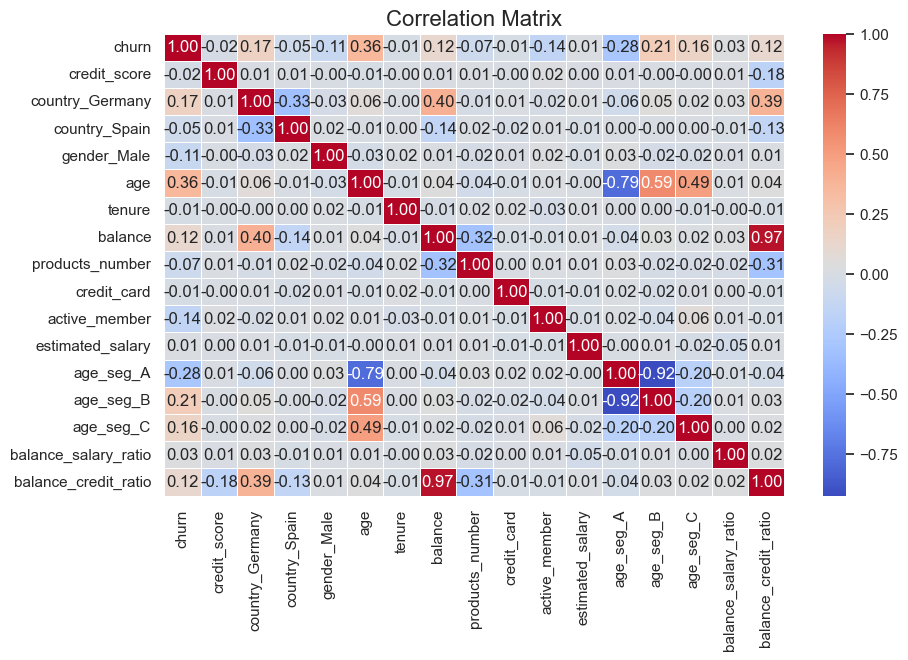

In [14]:
correlation_matrix = data[['churn', 'credit_score', 'country_Germany', 'country_Spain',
            'gender_Male', 'age', 'tenure', 'balance', 'products_number', 
            'credit_card', 'active_member', 'estimated_salary',
            'age_seg_A', 'age_seg_B', 'age_seg_C',
            'balance_salary_ratio', 'balance_credit_ratio']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

-> the percentage of Churn and Non-Churn

In [19]:
import plotly.express as px
import pandas as pd

product_counts = data['churn'].value_counts()
label_mapping = {0: 'Non-churn', 1: 'Churn'}

product_counts.index = product_counts.index.map(label_mapping)

# Create pie chart
fig = px.pie(
    names=product_counts.index,
    values=product_counts.values,
    title='Churn Status for Customers'
)

# Update trace to enhance the visual presentation
fig.update_traces(
    hoverinfo='label+percent+value',
    textinfo='percent',
    textfont_size=16,
    marker=dict(
        line=dict(color='#FFFFFF', width=2)
    )
)
fig.show()


-> Gender and churn


In [30]:
churned_data = data[data['churn'] == 1]

gender_counts = churned_data['gender'].value_counts()

gender_percentages = gender_counts.reset_index()
gender_percentages.columns = ['gender', 'count']

gender_percentages['percentage'] = (gender_percentages['count'] / gender_percentages['count'].sum() * 100).round(2)

# Step 4: Create the pie chart
fig = px.pie(
    gender_percentages,
    names='gender',                # Use gender for names
    values='percentage',           # Percentage values
    title='Churn Percentage by Gender',
    color='gender',               # Color by gender
    labels={'percentage': 'Percentage'},
    color_discrete_map={
        'Male': 'skyblue',        # Set color for Male
        'Female': 'lightpink'     # Set color for Female
    }
)

fig.update_layout(
    title_text='Percentage of Churn by Gender',
    legend_title_text='Gender',
)

fig.update_traces(
    hoverinfo='label+percent+value',
    textinfo='percent',
    textfont_size=16,
    marker=dict(
        line=dict(color='#FFFFFF', width=2)
    )
)
fig.show()

-> As we can see in the pie chart above, the percentage of the total number of 'Female' is bigger than the percentage of the total number of 'Male'

. that means 'Female' is more likely to be churned

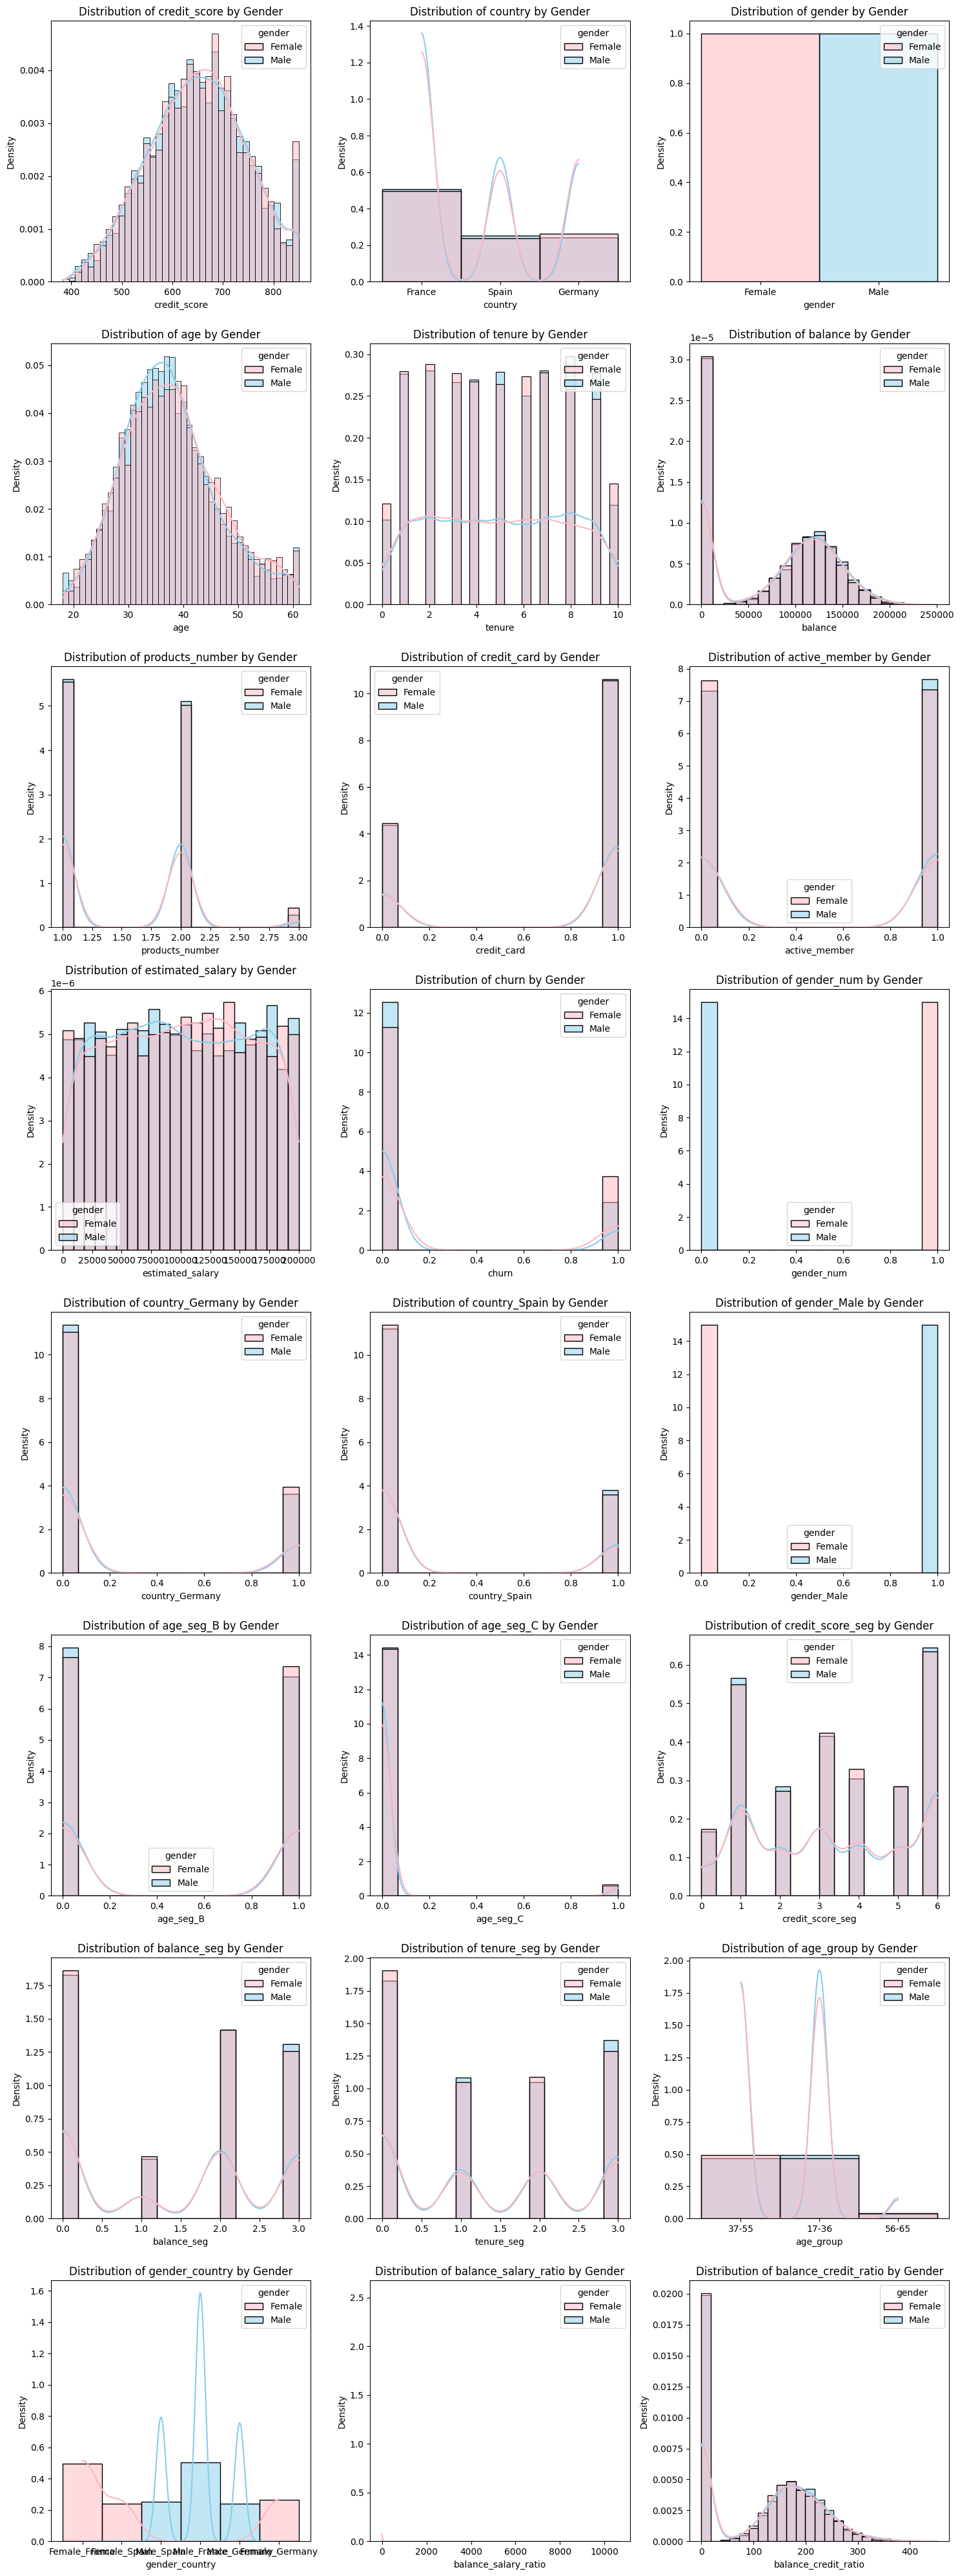

In [7]:
data['gender'] = data['gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

num_columns = len(data.columns) - 1  # Exclude the target variable if applicable
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate rows needed for 3 columns

fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
axs = axs.flat

# Loop through each feature and create a histogram
for i, column in enumerate(data.columns[:-1]):  # Exclude the target variable
    sns.histplot(
        data=data, 
        x=column, 
        hue="gender", 
        ax=axs[i], 
        kde=True, 
        stat="density", 
        common_norm=False,
        palette={'Male': 'skyblue', 'Female': 'lightpink'}  # Set custom colors for gender
    )
    axs[i].set_title(f'Distribution of {column} by Gender')

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


The graphs above show that males have a preference for females in many areas.

* AS WE CAN SHOW ABOVE IN GRAPH AGE BY GENDER MALE'S RANGE FROM 30 T0 40 IS GRATER THAN FEMALE 
    * ONE : NON-CHURN GENDER FROM 30 T0 40

In [11]:
import plotly.express as px

# Filter data for churn = 0 and age between 30 and 40
filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

# Count the gender distribution
gender_counts = filtered_data['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create a pie chart
fig = px.pie(gender_counts, values='count', names='gender', 
             title='Gender Distribution for Churn = 0 (Age 30-40)',
             color_discrete_map={
                     'Male': 'skyblue',        # Set color for Male
                    'Female': 'lightpink'})

# Show the pie chart
fig.show()


* THE PERSENTAGE OF MALE IS GREATER THAN FEMALE 

-> TWO : CREDIT SCORE FOR NON-CHURN CUSTOMER BY GENDER

In [16]:
import plotly.express as px

# Filter data for non-churn customers
filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

# Create a scatter plot with Plotly
fig = px.scatter(
    filtered_data, 
    x='credit_score', 
    y='balance', 
    color='gender', 
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    title='Credit Score vs Balance (Non-Churn) by Gender'
)

# Show the plot
fig.show()


In [17]:
import plotly.express as px

filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

fig = px.histogram(
    filtered_data,
    x='credit_score',
    y='balance',
    color='gender',
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    barmode='overlay',
    title='Credit Score vs Balance (Non-Churn) by Gender'
)

fig.update_layout(
    xaxis_title="Credit Score",
    yaxis_title="Balance",
    legend_title="Gender"
)

# Show the plot
fig.show()


* AS WE CAN SEE ABOVE MALE CREDIT SCORE FOR MALE IS GREATER THEN FEMALE IN THIS AGE REANGE

-> THREE : ESTEMATID SALARY AND BALANCE FOR NON-CHURN BY GENDER

In [18]:
import plotly.express as px

# Filter data for non-churn customers
filtered_data = data[(data['churn'] == 0)&(data['age'].between(30,40))]

# Create a scatter plot with Plotly
fig = px.scatter(
    filtered_data, 
    x='estimated_salary', 
    y='balance', 
    color='gender', 
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    title='Estimated Salary vs Balance (Non-Churn) by Gender'
)

# Show the plot
fig.show()


In [21]:
import plotly.express as px

# Filter data for non-churn customers
filtered_data = data[data['churn'] == 0]

# Create a 2D histogram plot for estimated_salary and balance, differentiated by gender
fig = px.histogram(
    filtered_data, 
    x='estimated_salary', 
    y='balance',
    barmode='overlay', 
    color='gender', 
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    nbins=20,  # Adjust the number of bins as needed
    title='Estimated Salary vs Balance (Non-Churn) by Gender',
)

# Show the plot
fig.show()


-> FOUR : ESTIMATED SALARY AND COUNTRY IN THIS RANGE FOR NON-CHURN BY GENDER

In [23]:
import plotly.express as px

# Filter data for non-churn customers aged between 30 and 40
filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

# Create a box plot for estimated_salary by country with gender differentiation
fig = px.box(
    filtered_data,
    x='country',
    y='estimated_salary',
    color='gender',
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    title='Estimated Salary by Country (Aged 30-40, Non-Churn)',
    labels={'estimated_salary': 'Estimated Salary', 'country': 'Country'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Estimated Salary',
    legend_title='Gender',
    boxmode='group'  # Group box plots by gender
)

# Show the plot
fig.show()


In [24]:
import plotly.express as px

# Filter data for non-churn customers aged between 30 and 40
filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

# Calculate the average estimated salary by country and gender
average_salary = filtered_data.groupby(['country', 'gender'])['estimated_salary'].mean().reset_index()

# Create a bar chart for average estimated salary by country with gender differentiation
fig = px.bar(
    average_salary,
    x='country',
    y='estimated_salary',
    color='gender',
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    title='Average Estimated Salary by Country (Aged 30-40, Non-Churn)',
    labels={'estimated_salary': 'Average Estimated Salary', 'country': 'Country'},
    barmode='group'  # Group bars by gender
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average Estimated Salary',
    legend_title='Gender'
)

# Show the plot
fig.show()


In [25]:
import plotly.express as px

# Filter data for non-churn customers aged between 30 and 40
filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

# Calculate the average estimated salary by country and gender
average_salary = filtered_data.groupby(['country', 'gender'])['balance'].mean().reset_index()

# Create a bar chart for average estimated salary by country with gender differentiation
fig = px.bar(
    average_salary,
    x='country',
    y='balance',
    color='gender',
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    title='Average balance by Country (Aged 30-40, Non-Churn)',
    labels={'balance': 'Average balance', 'country': 'Country'},
    barmode='group'  # Group bars by gender
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average balance',
    legend_title='Gender'
)

# Show the plot
fig.show()


In [26]:
import plotly.express as px

# Filter data for non-churn customers aged between 30 and 40
filtered_data = data[(data['churn'] == 0) & (data['age'].between(30, 40))]

# Calculate the average estimated salary by country and gender
average_salary = filtered_data.groupby(['active_member', 'gender'])['balance'].mean().reset_index()

# Create a bar chart for average estimated salary by country with gender differentiation
fig = px.bar(
    average_salary,
    x='active_member',
    y='balance',
    color='gender',
    color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
    title='Average balance by Country (Aged 30-40, Non-Churn)',
    labels={'balance': 'active members', 'active_member': 'Country'},
    barmode='group'
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='active_member',
    yaxis_title='Average balance',
    legend_title='Gender'
)

fig.show()


* TWO GRAPHS SHOW AS THAT THE FFEMALES BUY MORE EXPENSIVE THINGS THAN MEN

In [9]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

data['gender'] = data['gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

num_columns = len(data.columns) - 1  # Exclude the target variable if applicable
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate rows needed for 3 columns

# Create a subplot grid
fig = sp.make_subplots(rows=rows, cols=3, subplot_titles=data.columns[:-1])

# Loop through each feature and create a histogram
for i, column in enumerate(data.columns[:-1]):  # Exclude the target variable
    row = (i // 3) + 1
    col = (i % 3) + 1

    # Create histogram using plotly express
    hist_fig = px.histogram(
        data_frame=data,
        x=column,
        color="gender",
        color_discrete_map={'Male': 'skyblue', 'Female': 'lightpink'},
        histnorm='density',
        barmode='overlay'
    )
    
    # Add traces to the subplot
    for trace in hist_fig['data']:
        fig.add_trace(trace, row=row, col=col)

# Update the overall layout
fig.update_layout(
    height=rows * 300,  # Adjust height based on the number of rows
    width=900,
    title_text="Distributions of Features by Gender",
    showlegend=True
)

# Show the plot
fig.show()


-> Age with churn


In [27]:
churned_data = data[data['churn'] == 1]

gender_counts = churned_data['age_group'].value_counts()

gender_percentages = gender_counts.reset_index()
gender_percentages.columns = ['age_group', 'count']

gender_percentages['percentage'] = (gender_percentages['count'] / gender_percentages['count'].sum() * 100).round(2)

# Step 4: Create the pie chart
fig = px.pie(
    gender_percentages,
    names='age_group',                
    values='percentage',           
    title='Churn Percentage by Gender',
    labels={'percentage': 'Percentage'},
    color_discrete_map={
        'Male': 'skyblue',
        'Female': 'lightpink'     # Set color for Female
    }
)

fig.update_layout(
    title_text='Percentage of Churned Coustomers by Age Groups',
    legend_title_text='Age Groups',
)

fig.update_traces(
    hoverinfo='label+percent+value',
    textinfo='percent',
    textfont_size=16,
    marker=dict(
        line=dict(color='#FFFFFF', width=2)
    )
)
fig.show()

* As we can see the percentage of the age grops from 37 to 55 years old is the biggest 

-> FOR CHURN

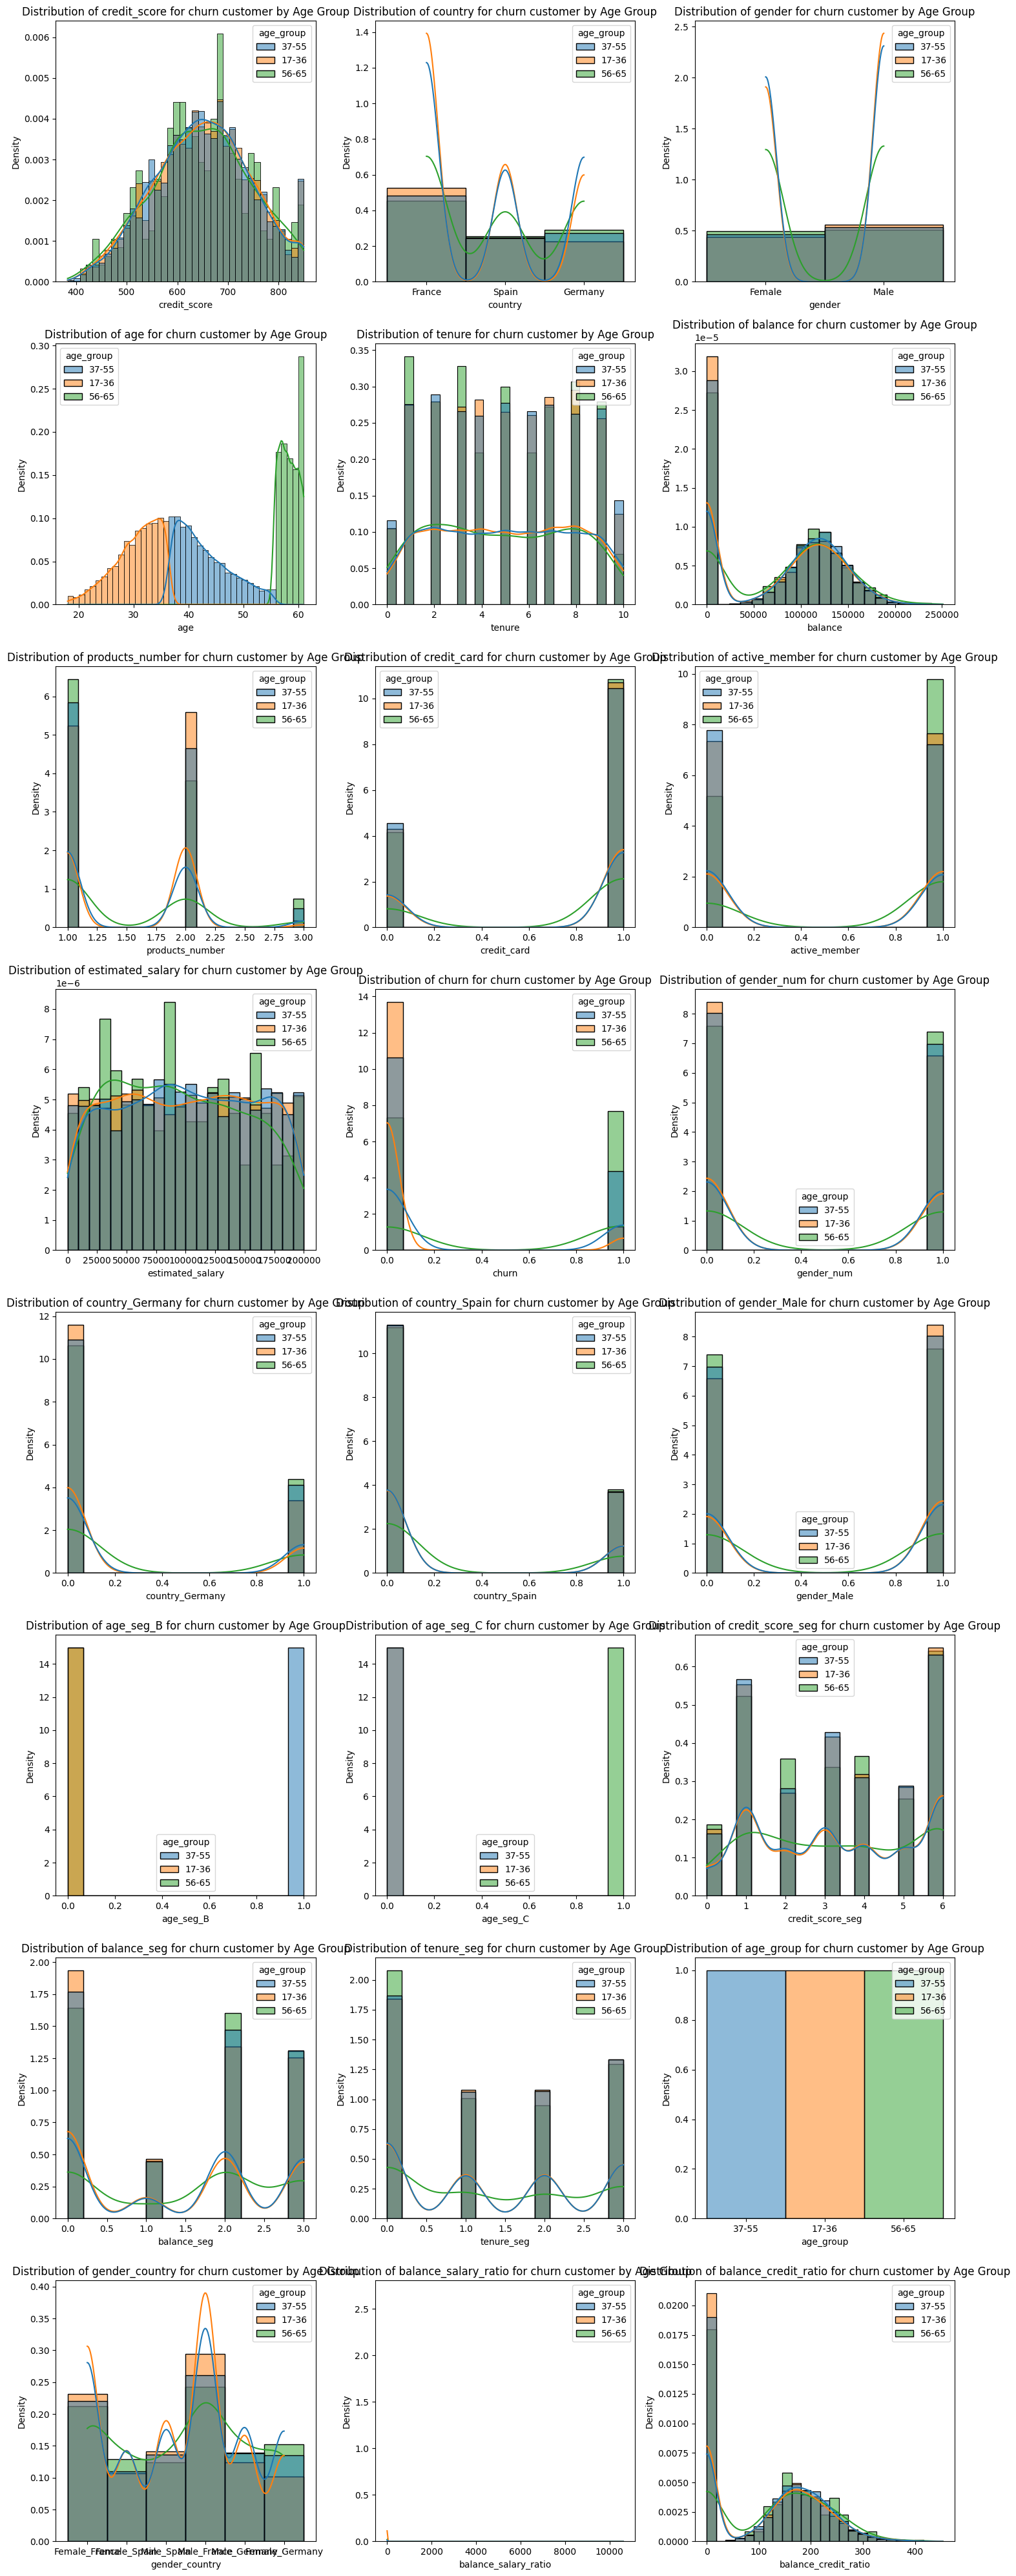

In [33]:
churn_data = data[data['churn']==1]
num_columns = len(data.columns) - 1
rows = (num_columns // 3) + (num_columns % 3 > 0)
fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
axs = axs.flat
for i, column in enumerate(churn_data.columns[:-1]):
    sns.histplot(data=data, x=column, hue="age_group", ax=axs[i], kde=True, stat="density", common_norm=False)
    axs[i].set_title(f'Distribution of {column} for churn customer by Age Group')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

-> Balance and churn


In [43]:
import pandas as pd
import plotly.express as px

# Step 1: Group by 'churn' and sum the 'balance'
balance_sums = data.groupby('churn')['balance'].sum().reset_index()

# Step 2: Calculate the percentage of balance for each churn status
total_balance = balance_sums['balance'].sum()
balance_sums['percentage'] = (balance_sums['balance'] / total_balance * 100).round(2)

# Step 3: Create the pie chart
fig = px.pie(
    balance_sums,
    names='churn',               # Use churn status for pie sections
    values='balance',            # Sum of balances
    title='Sum of Balances for Churned vs Non-Churned Customers',
    labels={'churn': 'Churn Status', 'balance': 'Balance'},
    color='churn',               # Color by churn status
    color_discrete_map={0: 'lightblue', 1: 'salmon'}  # Non-churned: lightblue, Churned: salmon
)

# Step 4: Customize layout and traces
fig.update_layout(
    title_text='Total Balance for Churn vs Non-Churn',
    legend_title_text='Churn Status'
)

fig.update_traces(
    hoverinfo='label+percent+value+name',
    textinfo='percent',
    textfont_size=16,
    marker=dict(
        line=dict(color='#FFFFFF', width=2)
    )
)

# Show the pie chart
fig.show()


* As we can see in the pie chart above, that the customer with the low balance is likely to be churned 

-> Credit score for churn and non-churn

In [50]:
import pandas as pd
import plotly.express as px

# Step 1: Group by 'churn' and sum the 'balance'
balance_sums = data.groupby('churn')['credit_score'].sum().reset_index()

# Step 2: Calculate the percentage of balance for each churn status
total_balance = balance_sums['credit_score'].sum()
balance_sums['percentage'] = (balance_sums['credit_score'] / total_balance * 100).round(2)

# Step 3: Create the pie chart
fig = px.pie(
    balance_sums,
    names='churn',               # Use churn status for pie sections
    values='credit_score',            # Sum of balances
    title='Sum of Balances for Churned vs Non-Churned Customers',
    labels={'churn': 'Churn Status', 'credit_score': 'credit_score'},
    color='churn',               # Color by churn status
    color_discrete_map={0: 'lightblue', 1: 'salmon'}  # Non-churned: lightblue, Churned: salmon
)

# Step 4: Customize layout and traces
fig.update_layout(
    title_text='Total credit_score for Churn vs Non-Churn',
    legend_title_text='Churn Status'
)

fig.update_traces(
    hoverinfo='label+percent+value+name',
    textinfo='percent',
    textfont_size=16,
    marker=dict(
        line=dict(color='#FFFFFF', width=2)
    )
)

# Show the pie chart
fig.show()


-> Credit score for churn status

In [69]:
import plotly.graph_objects as go

# Group data by 'credit_score_seg' and 'churn'
credit_score_churn = data.groupby(['credit_score_seg', 'churn']).size().unstack(fill_value=0)

# Create a stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Non-Churn', x=credit_score_churn.index, y=credit_score_churn[0], marker_color='deepskyblue'),
    go.Bar(name='Churn', x=credit_score_churn.index, y=credit_score_churn[1], marker_color='tomato')
])

# Change the bar mode to stacked
fig.update_layout(
    barmode='stack',
    title='Churn vs Non-Churn by Credit Score Segments',
    xaxis_title='Credit Score Range',
    yaxis_title='Count',
    legend_title='Churn Status'
)

# Show the plot
fig.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_16568\1830579636.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



-> Subplots for Credit Score ≥ 721

In [130]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for credit scores of 721 and above
filtered_data = data[data['credit_score'] >= 721]

# Create subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Age Distribution by Churn', 'Balance Distribution by Churn',
                   'Churn Count by Gender', 'Estimated Salary Distribution by Churn',
                   'Churn Count by Tenure', 'Churn Count by Country'),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}]]  # Maintain two bar charts in the last row
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['age'], 
                 name='Non-Churn', marker_color='deepskyblue', opacity=0.6),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['age'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=1, col=1
)

# Balance Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['balance'], 
                 name='Non-Churn', marker_color='lightgreen', opacity=0.6),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['balance'], 
                 name='Churn', marker_color='orange', opacity=0.6),
    row=1, col=2
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=gender_churn_counts.index, 
           y=gender_churn_counts[0], 
           name='Non-Churn', 
           marker_color='deepskyblue'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=gender_churn_counts.index, 
           y=gender_churn_counts[1], 
           name='Churn', 
           marker_color='tomato'),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
                 name='Non-Churn', marker_color='lightcoral', opacity=0.6),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
                 name='Churn', marker_color='gold', opacity=0.6),
    row=2, col=2
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=tenure_churn_counts.index, 
           y=tenure_churn_counts[0], 
           name='Non-Churn', 
           marker_color='deepskyblue'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=tenure_churn_counts.index, 
           y=tenure_churn_counts[1], 
           name='Churn', 
           marker_color='tomato'),
    row=3, col=1
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=country_churn_counts.index, 
           y=country_churn_counts[0], 
           name='Non-Churn', 
           marker_color='lightgreen'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=country_churn_counts.index, 
           y=country_churn_counts[1], 
           name='Churn', 
           marker_color='orange'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    title_text='Customer Churn Analysis for Credit Scores Greater Than 721',
    barmode='overlay',  # Overlay histograms
    showlegend=True,
    height=800,  # Adjust height for better spacing
    width=1000,  # Adjust width for better layout
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Show the plot
fig.show()



-> Subplots for Credit Score from 621 to 660

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for credit scores between 621 and 660
filtered_data = data[(data['credit_score'] >= 621) & (data['credit_score'] <= 660)]

# Create subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Age Distribution by Churn', 'Balance Distribution by Churn',
                   'Churn Count by Gender', 'Estimated Salary Distribution by Churn',
                   'Churn Count by Tenure', 'Churn Count by Country'),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}]]  # Maintain two bar charts in the last row
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['age'], 
                 name='Non-Churn', marker_color='deepskyblue', opacity=0.6),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['age'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=1, col=1
)

# Balance Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['balance'], 
                 name='Non-Churn', marker_color='lightgreen', opacity=0.6),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['balance'], 
                 name='Churn', marker_color='orange', opacity=0.6),
    row=1, col=2
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=gender_churn_counts.index, 
           y=gender_churn_counts[0], 
           name='Non-Churn', 
           marker_color='deepskyblue'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=gender_churn_counts.index, 
           y=gender_churn_counts[1], 
           name='Churn', 
           marker_color='tomato'),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
                 name='Non-Churn', marker_color='lightcoral', opacity=0.6),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
                 name='Churn', marker_color='gold', opacity=0.6),
    row=2, col=2
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=tenure_churn_counts.index, 
           y=tenure_churn_counts[0], 
           name='Non-Churn', 
           marker_color='deepskyblue'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=tenure_churn_counts.index, 
           y=tenure_churn_counts[1], 
           name='Churn', 
           marker_color='tomato'),
    row=3, col=1
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=country_churn_counts.index, 
           y=country_churn_counts[0], 
           name='Non-Churn', 
           marker_color='lightgreen'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=country_churn_counts.index, 
           y=country_churn_counts[1], 
           name='Churn', 
           marker_color='orange'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    title_text='Customer Churn Analysis for Credit Scores from 621 to 660',
    barmode='overlay',  # Overlay histograms
    showlegend=True,
    height=800,  # Adjust height for better spacing
    width=1000,  # Adjust width for better layout
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Show the plot
fig.show()


-> Subplots for Credit Score from 349 to 500

In [125]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for credit scores between 349 and 500
filtered_data = data[(data['credit_score'] >= 349) & (data['credit_score'] <= 500)]

# Create subplots with additional rows for tenure and country
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Age Distribution by Churn', 'Balance Distribution by Churn',
                   'Churn Count by Gender', 'Estimated Salary Distribution by Churn',
                   'Churn Count by Tenure', 'Churn Count by Country'),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}]]  # Change for the last row to accommodate two bar charts
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['age'], 
                 name='Non-Churn', marker_color='deepskyblue', opacity=0.6),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['age'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=1, col=1
)

# Balance Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['balance'], 
                 name='Non-Churn', marker_color='lightgreen', opacity=0.6),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['balance'], 
                 name='Churn', marker_color='orange', opacity=0.6),
    row=1, col=2
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=gender_churn_counts.index, 
           y=gender_churn_counts[0], 
           name='Non-Churn', 
           marker_color='deepskyblue'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=gender_churn_counts.index, 
           y=gender_churn_counts[1], 
           name='Churn', 
           marker_color='tomato'),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
                 name='Non-Churn', marker_color='lightcoral', opacity=0.6),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
                 name='Churn', marker_color='gold', opacity=0.6),
    row=2, col=2
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=tenure_churn_counts.index, 
           y=tenure_churn_counts[0], 
           name='Non-Churn', 
           marker_color='deepskyblue'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=tenure_churn_counts.index, 
           y=tenure_churn_counts[1], 
           name='Churn', 
           marker_color='tomato'),
    row=3, col=1
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=country_churn_counts.index, 
           y=country_churn_counts[0], 
           name='Non-Churn', 
           marker_color='lightgreen'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=country_churn_counts.index, 
           y=country_churn_counts[1], 
           name='Churn', 
           marker_color='orange'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    title_text='Customer Churn Analysis for Credit Scores from 349 to 500',
    barmode='overlay',  # Overlay histograms
    showlegend=True,
    height=800,  # Increased height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Show the plot
fig.show()


* A non-Churn customer is concentrated in the larger range category of 721, which represents 1836 people.
* 

-> active customers and churn status

In [79]:
import plotly.express as px
import pandas as pd

data['balance_seg'] = pd.cut(data['balance'], bins=[-1, 50000, 90000, 127000, np.inf],
                             labels=['0-50K', '50K-90K', '90K-127K', '127K+'])

balance_churn = data.groupby(['balance_seg', 'churn']).size().unstack(fill_value=0)

fig = px.bar(
    balance_churn.reset_index(), 
    x='balance_seg', 
    y=[0, 1],
    labels={'balance_seg': 'Balance Range', 'value': 'Count', 'variable': 'Churn Status'},
    title='Churn vs Non-Churn by Balance Range',
    color_discrete_map={0: 'deepskyblue', 1: 'tomato'}
)

fig.update_layout(
    xaxis_title='Balance Range',
    yaxis_title='Count',
    legend_title='Churn Status',
    barmode='group'
)

fig.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_16568\3406277335.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



* As we can see in the chart above that the customers with balance from 90k to 127k are likely to be churned

* the customers with balance from 0-50k are likely to be non-churned

In [124]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for balance between 0 and 50,000
filtered_data = data[(data['balance'] >= 0) & (data['balance'] <= 50000)]

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the data for balance greater than 127,001
filtered_data = data[data['balance'] >= 127001]

# Create subplots with specified size
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        'Age Distribution by Churn', 
        'Churn Count by active', 
        'Credit Score Distribution by Churn', 
        'Estimated Salary Distribution by Churn', 
        'Churn Count by Country', 
        'Churn Count by Gender',
        'Churn Count by Product Number',
        'Churn Count by Tenure'
    ),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['age'], 
        name='Non-Churn', marker_color='deepskyblue', opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['age'], 
        name='Churn', marker_color='tomato', opacity=0.6
    ),
    row=1, col=1
)

# Balance Distribution by Churn
country_churn_counts = filtered_data.groupby('active_member')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=1, col=2
)

# Credit Score Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
        name='Non-Churn', marker_color='lightblue', opacity=0.6
    ),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
        name='Churn', marker_color='darkblue', opacity=0.6
    ),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
        name='Non-Churn', marker_color='lightcoral', opacity=0.6
    ),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
        name='Churn', marker_color='darkred', opacity=0.6
    ),
    row=2, col=2
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=3, col=1
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=3, col=1
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[0], 
        name='Non-Churn', 
        marker_color='lightgreen'
    ),
    row=3, col=2
)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[1], 
        name='Churn', 
        marker_color='darkgreen'
    ),
    row=3, col=2
)

# Churn Count by Product Number
products_num_churn_counts = filtered_data.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=1
)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=1
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=2
)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=2
)

# Update layout for spacing and borders
fig.update_layout(
    title_text='Customer Churn Analysis for Balances Between 0 to 50k',    
    barmode='overlay',  # Overlay mode for better comparison
    showlegend=True,
    height=1000,  # Increased height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Update axes titles
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Active Member', row=1, col=2)
fig.update_xaxes(title_text='Credit Score', row=2, col=1)
fig.update_xaxes(title_text='Estimated Salary', row=2, col=2)
fig.update_xaxes(title_text='Country', row=3, col=1)
fig.update_xaxes(title_text='Gender', row=3, col=2)
fig.update_xaxes(title_text='Products Number', row=4, col=1)
fig.update_xaxes(title_text='Tenure', row=4, col=2)

# Update y-axis titles for better readability
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=2)
fig.update_yaxes(title_text='Count', row=3, col=1)
fig.update_yaxes(title_text='Count', row=3, col=2)
fig.update_yaxes(title_text='Count', row=4, col=1)
fig.update_yaxes(title_text='Count', row=4, col=2)

# Show the plot
fig.show()


In [123]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for balance between 50,001 and 90,000
filtered_data = data[(data['balance'] >= 50001) & (data['balance'] <= 90000)]

fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        'Age Distribution by Churn', 
        'Churn Count by active', 
        'Credit Score Distribution by Churn', 
        'Estimated Salary Distribution by Churn', 
        'Churn Count by Country', 
        'Churn Count by Gender',
        'Churn Count by Product Number',
        'Churn Count by Tenure'
    ),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['age'], 
        name='Non-Churn', marker_color='deepskyblue', opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['age'], 
        name='Churn', marker_color='tomato', opacity=0.6
    ),
    row=1, col=1
)

# Balance Distribution by Churn
country_churn_counts = filtered_data.groupby('active_member')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=1, col=2
)

# Credit Score Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
        name='Non-Churn', marker_color='lightblue', opacity=0.6
    ),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
        name='Churn', marker_color='darkblue', opacity=0.6
    ),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
        name='Non-Churn', marker_color='lightcoral', opacity=0.6
    ),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
        name='Churn', marker_color='darkred', opacity=0.6
    ),
    row=2, col=2
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=3, col=1
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=3, col=1
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[0], 
        name='Non-Churn', 
        marker_color='lightgreen'
    ),
    row=3, col=2
)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[1], 
        name='Churn', 
        marker_color='darkgreen'
    ),
    row=3, col=2
)

# Churn Count by Product Number
products_num_churn_counts = filtered_data.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=1
)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=1
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=2
)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=2
)

# Update layout for spacing and borders
fig.update_layout(
    title_text='Customer Churn Analysis for Balances Between 50k to 90k',    
    barmode='overlay',  # Overlay mode for better comparison
    showlegend=True,
    height=1000,  # Increased height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Update axes titles
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Active Member', row=1, col=2)
fig.update_xaxes(title_text='Credit Score', row=2, col=1)
fig.update_xaxes(title_text='Estimated Salary', row=2, col=2)
fig.update_xaxes(title_text='Country', row=3, col=1)
fig.update_xaxes(title_text='Gender', row=3, col=2)
fig.update_xaxes(title_text='Products Number', row=4, col=1)
fig.update_xaxes(title_text='Tenure', row=4, col=2)

# Update y-axis titles for better readability
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=2)
fig.update_yaxes(title_text='Count', row=3, col=1)
fig.update_yaxes(title_text='Count', row=3, col=2)
fig.update_yaxes(title_text='Count', row=4, col=1)
fig.update_yaxes(title_text='Count', row=4, col=2)

# Show the plot
fig.show()

In [118]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the data for balance between 90,001 and 127,000
filtered_data = data[(data['balance'] >= 90001) & (data['balance'] <= 127000)]

# Create subplots
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        'Age Distribution by Churn', 
        'Churn Count by Active Member', 
        'Credit Score Distribution by Churn', 
        'Estimated Salary Distribution by Churn', 
        'Churn Count by Country', 
        'Churn Count by Gender',
        'Churn Count by Product Number',
        'Churn Count by Tenure'
    ),
    specs=[[{'type': 'histogram'}, {'type': 'bar'}],
           [{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['age'], 
        name='Non-Churn', marker_color='deepskyblue', opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['age'], 
        name='Churn', marker_color='tomato', opacity=0.6
    ),
    row=1, col=1
)

# Churn Count by Active Member
active_member_churn_counts = filtered_data.groupby('active_member')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=active_member_churn_counts.index, 
        y=active_member_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=active_member_churn_counts.index, 
        y=active_member_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=1, col=2
)

# Credit Score Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
        name='Non-Churn', marker_color='lightblue', opacity=0.6
    ),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
        name='Churn', marker_color='darkblue', opacity=0.6
    ),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
        name='Non-Churn', marker_color='lightcoral', opacity=0.6
    ),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
        name='Churn', marker_color='darkred', opacity=0.6
    ),
    row=2, col=2
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=3, col=1
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=3, col=1
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[0], 
        name='Non-Churn', 
        marker_color='lightgreen'
    ),
    row=3, col=2
)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[1], 
        name='Churn', 
        marker_color='darkgreen'
    ),
    row=3, col=2
)

# Churn Count by Product Number
products_num_churn_counts = filtered_data.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=1
)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=1
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=2
)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=2
)

# Update layout for spacing and borders
fig.update_layout(
    title_text='Customer Churn Analysis for Balances Between 90k and 127k',
    barmode='overlay',  # Overlay mode for better comparison
    showlegend=True,
    height=1000,  # Increased height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Update axes titles
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Active Member', row=1, col=2)
fig.update_xaxes(title_text='Credit Score', row=2, col=1)
fig.update_xaxes(title_text='Estimated Salary', row=2, col=2)
fig.update_xaxes(title_text='Country', row=3, col=1)
fig.update_xaxes(title_text='Gender', row=3, col=2)
fig.update_xaxes(title_text='Products Number', row=4, col=1)
fig.update_xaxes(title_text='Tenure', row=4, col=2)

# Update y-axis titles for better readability
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=2)
fig.update_yaxes(title_text='Count', row=3, col=1)
fig.update_yaxes(title_text='Count', row=3, col=2)
fig.update_yaxes(title_text='Count', row=4, col=1)
fig.update_yaxes(title_text='Count', row=4, col=2)

# Show the plot
fig.show()


In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the data for balance greater than 127,001
filtered_data = data[data['balance'] >= 127001]

# Create subplots with specified size
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        'Age Distribution by Churn', 
        'Churn Count by active', 
        'Credit Score Distribution by Churn', 
        'Estimated Salary Distribution by Churn', 
        'Churn Count by Country', 
        'Churn Count by Gender',
        'Churn Count by Product Number',
        'Churn Count by Tenure'
    ),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['age'], 
        name='Non-Churn', marker_color='deepskyblue', opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['age'], 
        name='Churn', marker_color='tomato', opacity=0.6
    ),
    row=1, col=1
)

# Balance Distribution by Churn
country_churn_counts = filtered_data.groupby('active_member')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=1, col=2
)

# Credit Score Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
        name='Non-Churn', marker_color='lightblue', opacity=0.6
    ),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
        name='Churn', marker_color='darkblue', opacity=0.6
    ),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
        name='Non-Churn', marker_color='lightcoral', opacity=0.6
    ),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
        name='Churn', marker_color='darkred', opacity=0.6
    ),
    row=2, col=2
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=3, col=1
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=3, col=1
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[0], 
        name='Non-Churn', 
        marker_color='lightgreen'
    ),
    row=3, col=2
)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[1], 
        name='Churn', 
        marker_color='darkgreen'
    ),
    row=3, col=2
)

# Churn Count by Product Number
products_num_churn_counts = filtered_data.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=1
)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=1
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=2
)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=2
)

# Update layout for spacing and borders
fig.update_layout(
    title_text='Customer Churn Analysis for Balances Greater than 127k',    
    barmode='overlay',  # Overlay mode for better comparison
    showlegend=True,
    height=1000,  # Increased height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Update axes titles
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Active Member', row=1, col=2)
fig.update_xaxes(title_text='Credit Score', row=2, col=1)
fig.update_xaxes(title_text='Estimated Salary', row=2, col=2)
fig.update_xaxes(title_text='Country', row=3, col=1)
fig.update_xaxes(title_text='Gender', row=3, col=2)
fig.update_xaxes(title_text='Products Number', row=4, col=1)
fig.update_xaxes(title_text='Tenure', row=4, col=2)

# Update y-axis titles for better readability
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=2)
fig.update_yaxes(title_text='Count', row=3, col=1)
fig.update_yaxes(title_text='Count', row=3, col=2)
fig.update_yaxes(title_text='Count', row=4, col=1)
fig.update_yaxes(title_text='Count', row=4, col=2)

# Show the plot
fig.show()

In [88]:
import plotly.express as px

active_churn_counts = data.groupby(['active_member', 'churn']).size().reset_index(name='count')
active_churn_counts['active_member_status'] = active_churn_counts['active_member'].map({0: 'Inactive', 1: 'Active'})
active_churn_counts['label'] = active_churn_counts.apply(
    lambda row: f"{'Churn' if row['churn'] == 1 else 'Non-Churn'} - {row['active_member_status']}", axis=1)

fig = px.pie(
    active_churn_counts, 
    names='label', 
    values='count', 
    title='Churn vs Non-Churn by Active Membership',
    color_discrete_map={
        'Churn - Active': 'tomato', 
        'Non-Churn - Active': 'deepskyblue',
        'Churn - Inactive': 'lightsalmon', 
        'Non-Churn - Inactive': 'lightblue'
    }
)

fig.update_traces(
    textinfo='percent+label',
    textposition='outside', 
    hoverinfo='label+percent+value',
    marker=dict(line=dict(color='#FFFFFF', width=2))
)

fig.show()


In [115]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

filtered_data = data[data['active_member'] == 1]  # Assuming active members are marked with 1

# Create subplots with specified size
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        'Age Distribution by Churn', 
        'Balance Distribution by Churn', 
        'Credit Score Distribution by Churn', 
        'Estimated Salary Distribution by Churn', 
        'Churn Count by Country', 
        'Churn Count by Gender',
        'Churn Count by Product Number',
        'Churn Count by Tenure'
    ),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['age'], 
        name='Non-Churn', marker_color='deepskyblue', opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['age'], 
        name='Churn', marker_color='tomato', opacity=0.6
    ),
    row=1, col=1
)

# Balance Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['balance'], 
        name='Non-Churn', marker_color='lightgreen', opacity=0.6
    ),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['balance'], 
        name='Churn', marker_color='darkgreen', opacity=0.6
    ),
    row=1, col=2
)

# Credit Score Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
        name='Non-Churn', marker_color='lightblue', opacity=0.6
    ),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
        name='Churn', marker_color='darkblue', opacity=0.6
    ),
    row=2, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
        name='Non-Churn', marker_color='lightcoral', opacity=0.6
    ),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(
        x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
        name='Churn', marker_color='darkred', opacity=0.6
    ),
    row=2, col=2
)

# Churn Count by Country
country_churn_counts = filtered_data.groupby('country')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=3, col=1
)
fig.add_trace(
    go.Bar(
        x=country_churn_counts.index, 
        y=country_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=3, col=1
)

# Churn Count by Gender
gender_churn_counts = filtered_data.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[0], 
        name='Non-Churn', 
        marker_color='lightgreen'
    ),
    row=3, col=2
)
fig.add_trace(
    go.Bar(
        x=gender_churn_counts.index, 
        y=gender_churn_counts[1], 
        name='Churn', 
        marker_color='darkgreen'
    ),
    row=3, col=2
)

# Churn Count by Product Number
products_num_churn_counts = filtered_data.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=1
)
fig.add_trace(
    go.Bar(
        x=products_num_churn_counts.index, 
        y=products_num_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=1
)

# Churn Count by Tenure
tenure_churn_counts = filtered_data.groupby('tenure')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[0], 
        name='Non-Churn', 
        marker_color='deepskyblue'
    ),
    row=4, col=2
)
fig.add_trace(
    go.Bar(
        x=tenure_churn_counts.index, 
        y=tenure_churn_counts[1], 
        name='Churn', 
        marker_color='tomato'
    ),
    row=4, col=2
)

# Update layout for spacing and borders
fig.update_layout(
    title_text='Subplots for Active Members with Churn Status',
    barmode='overlay',  # Overlay mode for better comparison
    showlegend=True,
    height=1000,  # Increased height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Update axes titles
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Balance', row=1, col=2)
fig.update_xaxes(title_text='Credit Score', row=2, col=1)
fig.update_xaxes(title_text='Estimated Salary', row=2, col=2)
fig.update_xaxes(title_text='Country', row=3, col=1)
fig.update_xaxes(title_text='Gender', row=3, col=2)
fig.update_xaxes(title_text='Products Number', row=4, col=1)
fig.update_xaxes(title_text='Tenure', row=4, col=2)

# Update y-axis titles for better readability
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=2)
fig.update_yaxes(title_text='Count', row=3, col=1)
fig.update_yaxes(title_text='Count', row=3, col=2)
fig.update_yaxes(title_text='Count', row=4, col=1)
fig.update_yaxes(title_text='Count', row=4, col=2)

# Show the plot
fig.show()


-> Churned by Products Number

In [132]:
import plotly.express as px
import pandas as pd

# Filter the data for customers with an estimated salary between 150k and 200k, and churned (churn = 1)
filtered_data = data[(data['estimated_salary'] >=0) & (data['estimated_salary'] <= 200000) & (data['churn'] == 1)]


# Count the occurrences of each number of products
product_counts = filtered_data['products_number'].value_counts()

# Create pie chart
fig = px.pie(
    names=product_counts.index,
    values=product_counts.values,
)

fig.update_layout(
    title_text='Percentage of Churned by Products Number',
    legend_title_text='Products Number',
)

fig.show()



In [135]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for a specific products_number (adjust as necessary)
filtered_data = data[data['products_number'] > 0]

# Create subplots
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Balance Distribution by Churn Status', 'Country Count by Churn Status',
                   'Gender Count by Churn Status', 'Age Distribution by Churn Status',
                   'Active Member Count by Churn Status', 'Estimated Salary Distribution by Churn Status',
                   'Tenure Distribution by Churn Status', 'Credit Score Distribution by Churn Status'),
    specs=[[{'type': 'histogram'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'histogram'}]]
)

# Balance Distribution by Churn Status
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['balance'], 
                 name='Non-Churn', marker_color='lightgreen', opacity=0.6),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['balance'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=1, col=1
)

# Country Count by Churn Status
country_counts = filtered_data.groupby(['country', 'churn']).size().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=country_counts.index, y=country_counts[0], 
           name='Non-Churn', marker_color='lightblue'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=country_counts.index, y=country_counts[1], 
           name='Churn', marker_color='lightcoral'),
    row=1, col=2
)

# Gender Count by Churn Status
gender_counts = filtered_data.groupby(['gender', 'churn']).size().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=gender_counts.index, y=gender_counts[0], 
           name='Non-Churn', marker_color='lightgreen'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=gender_counts.index, y=gender_counts[1], 
           name='Churn', marker_color='tomato'),
    row=2, col=1
)

# Age Distribution by Churn Status
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['age'], 
                 name='Non-Churn', marker_color='gold', opacity=0.6),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['age'], 
                 name='Churn', marker_color='orange', opacity=0.6),
    row=2, col=2
)

# Active Member Count by Churn Status
active_member_counts = filtered_data.groupby('active_member')['churn'].value_counts().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=active_member_counts.index, y=active_member_counts[0], 
           name='Non-Churn', marker_color='lightblue'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=active_member_counts.index, y=active_member_counts[1], 
           name='Churn', marker_color='tomato'),
    row=3, col=1
)

# Estimated Salary Distribution by Churn Status
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
                 name='Non-Churn', marker_color='orange', opacity=0.6),
    row=3, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
                 name='Churn', marker_color='darkred', opacity=0.6),
    row=3, col=2
)

# Tenure Distribution by Churn Status
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['tenure'], 
                 name='Non-Churn', marker_color='deepskyblue', opacity=0.6),
    row=4, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['tenure'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=4, col=1
)

# Credit Score Distribution by Churn Status
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
                 name='Non-Churn', marker_color='purple', opacity=0.6),
    row=4, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
                 name='Churn', marker_color='orange', opacity=0.6),
    row=4, col=2
)

# Update layout
fig.update_layout(
    title_text='Customer Features Analysis by Churn Status for Products Number',
    barmode='overlay',  # Overlay histograms
    showlegend=True,
    height=1000,  # Adjust height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Show the plot
fig.show()


-> pie chart for credit card churned

In [159]:
# plotly pie chart for cherned with credit card

import plotly.express as px
import pandas as pd

# Filter the data for customers with a credit card (creditcard_present = 1) and churned (churn = 1)

filtered_data = data[(data['credit_card'] == 1)]


Credit_counts = filtered_data['churn'].value_counts()


fig = px.pie(
    names=Credit_counts.index,
    values=Credit_counts.values,
)
fig.update_layout(
    title_text='Percentage of have Credit Card with Churn Status',
    legend_title_text='Churn Status',
)
fig.show()

In [160]:
filtered_data = data[(data['credit_card'] == 0)]


Credit_counts = filtered_data['churn'].value_counts()


fig = px.pie(
    names=Credit_counts.index,
    values=Credit_counts.values,
)
fig.update_layout(
    title_text='Percentage of  Non-Credit Card with Churn Status',
    legend_title_text='Churn Status',
)
fig.show()

In [143]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for customers with a credit card
filtered_data = data[data['credit_card'] == 1]  # Assuming credit_card indicates if the customer has a credit card

# Create subplots
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Balance Distribution by Churn', 'Country Count by Churn',
                   'Gender Count by Churn', 'Age Distribution by Churn',
                   'Active Member Count by Churn', 'Estimated Salary Distribution by Churn',
                   'Tenure Distribution by Churn', 'Credit Score Distribution by Churn'),
    specs=[[{'type': 'histogram'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'bar'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'histogram'}]]
)

# Balance Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['balance'], 
                 name='Non-Churn', marker_color='lightgreen', opacity=0.6),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['balance'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=1, col=1
)

# Country Count by Churn
country_counts = filtered_data.groupby(['country', 'churn']).size().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=country_counts.index, y=country_counts[0], 
           name='Non-Churn', marker_color='lightblue'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=country_counts.index, y=country_counts[1], 
           name='Churn', marker_color='orange'),
    row=1, col=2
)

# Gender Count by Churn
gender_counts = filtered_data.groupby(['gender', 'churn']).size().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=gender_counts.index, y=gender_counts[0], 
           name='Non-Churn', marker_color='deepskyblue'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=gender_counts.index, y=gender_counts[1], 
           name='Churn', marker_color='tomato'),
    row=2, col=1
)

# Age Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['age'], 
                 name='Non-Churn', marker_color='gold', opacity=0.6),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['age'], 
                 name='Churn', marker_color='red', opacity=0.6),
    row=2, col=2
)

# Active Member Count by Churn
active_member_counts = filtered_data.groupby(['active_member', 'churn']).size().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=active_member_counts.index, y=active_member_counts[0], 
           name='Non-Churn', marker_color='lightcoral'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=active_member_counts.index, y=active_member_counts[1], 
           name='Churn', marker_color='darkred'),
    row=3, col=1
)

# Estimated Salary Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['estimated_salary'], 
                 name='Non-Churn', marker_color='purple', opacity=0.6),
    row=3, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['estimated_salary'], 
                 name='Churn', marker_color='orange', opacity=0.6),
    row=3, col=2
)

# Tenure Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['tenure'], 
                 name='Non-Churn', marker_color='deepskyblue', opacity=0.6),
    row=4, col=1
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['tenure'], 
                 name='Churn', marker_color='tomato', opacity=0.6),
    row=4, col=1
)

# Credit Score Distribution by Churn
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 0]['credit_score'], 
                 name='Non-Churn', marker_color='lightgreen', opacity=0.6),
    row=4, col=2
)
fig.add_trace(
    go.Histogram(x=filtered_data[filtered_data['churn'] == 1]['credit_score'], 
                 name='Churn', marker_color='red', opacity=0.6),
    row=4, col=2
)

# Products Number Count by Churn
products_counts = filtered_data.groupby(['products_number', 'churn']).size().unstack(fill_value=0)
fig.add_trace(
    go.Bar(x=products_counts.index, y=products_counts[0], 
           name='Non-Churn', marker_color='lightgreen'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=products_counts.index, y=products_counts[1], 
           name='Churn', marker_color='orange'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    title_text='Customer Features Analysis for Credit Card Holders with Churn Status',
    barmode='overlay',  # Overlay histograms and bars
    showlegend=True,
    height=1000,  # Adjust height for better spacing
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Show the plot
fig.show()


In [144]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for customers with a credit card
filtered_data = data[data['credit_card'] == 1]  # Assuming credit_card indicates if the customer has a credit card

# Create a bar plot for Products Number with Churn Status
products_counts = filtered_data.groupby(['products_number', 'churn']).size().unstack(fill_value=0)

# Create figure
fig = go.Figure()

# Add traces for Non-Churn and Churn
fig.add_trace(
    go.Bar(x=products_counts.index, 
           y=products_counts[0], 
           name='Non-Churn', 
           marker_color='lightblue')
)

fig.add_trace(
    go.Bar(x=products_counts.index, 
           y=products_counts[1], 
           name='Churn', 
           marker_color='tomato')
)

# Update layout
fig.update_layout(
    title_text='Products Number vs Churn Status for Credit Card Holders',
    xaxis_title='Number of Products',
    yaxis_title='Count',
    barmode='group',  # Group bars by churn status
    showlegend=True,
    height=600,
    margin=dict(l=40, r=40, t=40, b=40)  # Set margins for all sides
)

# Show the plot
fig.show()
